c:\users\betul\appdata\local\programs\python\python38-32\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
c:\users\betul\appdata\local\programs\python\python38-32\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


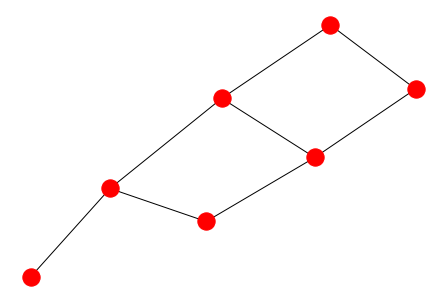

The edge (1, 2) weight 5.999999999999999
The edge (1, 3) weight 10.666666666666666
The edge (2, 4) weight 9.333333333333332
The edge (3, 4) weight 9.0
The edge (3, 5) weight 14.333333333333332
The edge (4, 6) weight 9.666666666666666
The edge (5, 6) weight 9.0
The edge (5, 7) weight 12.0
Max 14.333333333333332
The edge (1, 2) weight 7.0
The edge (1, 3) weight 7.0
The edge (2, 4) weight 13.0
The edge (3, 4) weight 13.0
The edge (4, 6) weight 24.0
The edge (5, 6) weight 20.0
The edge (5, 7) weight 12.0
Max 24.0


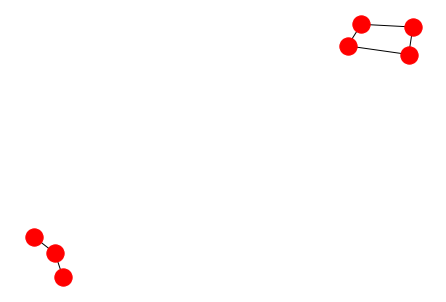

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

def readGraphFrom():
    #read graph from txt file
    G = nx.read_edgelist("graph.txt", create_using=nx.Graph(), nodetype=int)
    return G

def edgeBetwennness(G):
    for root in G:
        #print(root)
        #I took SPG above the for loop
        for vertex in G:
            for shortest_path in nx.all_shortest_paths(G, source=vertex, target=root):
                #print(shortest_path)
                 SPG.add_path(shortest_path)
                #print([p for p in nx.all_shortest_paths(G, source=vertex, target=1)])
        #nx.draw(SPG)
        #plt.show()

        max_distance = 0
        for node in SPG:
            if node==root:
                attrs = {node: {'distance': 0, 'weight': 1}}
            else:
                distance = nx.shortest_path_length(SPG, source=root, target=node)
                if distance > max_distance:
                    max_distance = distance
                attrs = {node: {'distance': distance, 'weight': len(list(nx.all_shortest_paths(SPG, source=root, target=node)))}}
            nx.set_node_attributes(SPG, attrs)

        #for node in SPG:
            #print(SPG.nodes[node]['distance'])
            #print(SPG.nodes[node]['weight'])

        for leaf in SPG:
            if SPG.nodes[leaf]['distance'] == max_distance:
                for node1, node2 in SPG.edges(leaf):
                    if node1 == leaf:
                        neighbor = node2
                    else:
                        neighbor = node1
                    attrs = {(node1, node2): {root: SPG.nodes[neighbor]['weight']/SPG.nodes[leaf]['weight']}}
                    nx.set_edge_attributes(SPG, attrs)


        #print(SPG.edges[5, 6][1])
        #print(SPG.edges[4, 6][1])
        #print(SPG.edges[5, 7][1])

        while max_distance > 1:
            max_distance = max_distance-1
            for node in SPG:
                if SPG.nodes[node]['distance'] == max_distance:
                    #print(node)
                    for node1, node2 in SPG.edges(node):
                        if node1 == node:
                            neighborUP = node2
                        else:
                            neighborUP = node1
                        if SPG.nodes[neighborUP]['distance'] == max_distance - 1:
                            sum_of_scores = 0
                            for node11, node22 in SPG.edges(node):
                                if node11 == node:
                                    neighborDOWN = node22
                                else:
                                    neighborDOWN = node11
                                if SPG.nodes[neighborDOWN]['distance'] == max_distance + 1:
                                    sum_of_scores = sum_of_scores + SPG.edges[neighborDOWN, node][root]
                            #print(sum_of_scores)
                            #print((1 + sum_of_scores)*SPG.nodes[neighborUP]['weight']/SPG.nodes[node]['weight'])
                            attrs = {(node, neighborUP): {root: (1 + sum_of_scores)*SPG.nodes[neighborUP]['weight']/SPG.nodes[node]['weight']}}
                            nx.set_edge_attributes(SPG, attrs)

        #for edge in SPG.edges:
            #print(edge)
            #print(SPG.edges[edge][root])
    return SPG


def fullEdgeBetwennness(SPG):
    for edge in SPG.edges:
        attrs = {edge: {'weight': 0.0}}
        nx.set_edge_attributes(SPG, attrs)
        #print(edge)
        for root in G: 
            #print(root)
            #print(edge)
            #print(SPG.edges[edge][root])
            #print("Root", root, "-> ", SPG.edges[edge]['weight'], "=", SPG.edges[edge][root], "+",SPG.edges[edge]['weight'])
            SPG.edges[edge]['weight'] = SPG.edges[edge][root] + SPG.edges[edge]['weight']
        #print("The edge", edge, "weight", SPG.edges[edge]['weight'])
    return SPG

def maxScoreEdge(SPG):
    maxScore = 0.0
    for edge in SPG.edges:
        if maxScore < SPG.edges[edge]['weight']:
            maxScore = SPG.edges[edge]['weight']
            edgeRemove = edge
    return maxScore

def removeEdge(maxScore, SPG):
    cSPG = SPG.copy()
    for edge in cSPG.edges:
        if cSPG.edges[edge]['weight'] == maxScore:
            SPG.remove_edge(*edge)
    return SPG

G = readGraphFrom()
nx.draw(G)
plt.show()
SPG = nx.Graph()
#it crushes if we run the code more than 2 times
for i in range(2):
    SPG = edgeBetwennness(G)
    SPG = fullEdgeBetwennness(SPG)
    maxScore = maxScoreEdge(SPG)
    #print("Max", maxScore)
    SPG = removeEdge(maxScore, SPG)
    G = SPG.copy()

nx.draw(SPG)



